In [ ]:
from google.colab import files
data = files.upload()

Saving 01Students.csv to 01Students.csv


In [ ]:
data

{'01Students.csv': b'Hours,Marks\r\n0,34\r\n1,36\r\n1,33\r\n1,39\r\n1,42\r\n2,45\r\n2,38\r\n3,45\r\n3,53\r\n3,46\r\n3,56\r\n4,59\r\n4,55\r\n4,56\r\n5,72\r\n5,59\r\n6,62\r\n6,71\r\n7,78\r\n7,88\r\n7,61\r\n7,74\r\n8,71\r\n8,89\r\n9,82\r\n9,67\r\n9,89\r\n10,81\r\n10,82\r\n11,79\r\n'}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('01Students.csv')
df

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [ ]:
# processing the EDA

df.shape

(30, 2)

In [ ]:
df.head(7)

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38


In [ ]:
df.tail(7)

,Hours,Marks
23,8,89
24,9,82
25,9,67
26,9,89
27,10,81
28,10,82
29,11,79


In [ ]:
df.iloc[15:23]

,Hours,Marks
15,5,59
16,6,62
17,6,71
18,7,78
19,7,88
20,7,61
21,7,74
22,8,71


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [ ]:
df.isnull().sum()

Hours    0
Marks    0
dtype: int64

In [ ]:
# splite x as independent and y as predicated
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

Text(0.5, 1.0, 'Student Program')

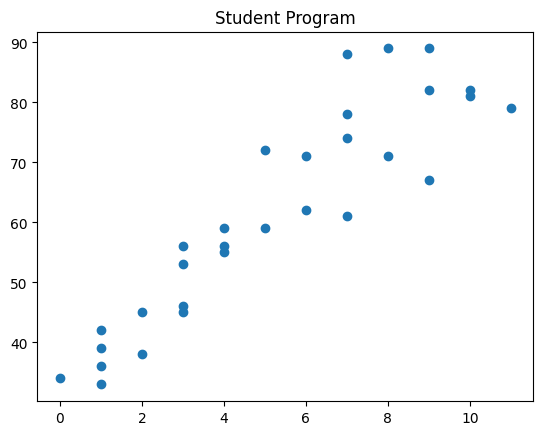

In [ ]:
plt.scatter(X,Y)
plt.title("Student Program")

In [ ]:
X


,Hours
0,0
1,1
2,1
3,1
4,1
5,2
6,2
7,3
8,3
9,3


In [ ]:
Y

0     34
1     36
2     33
3     39
4     42
5     45
6     38
7     45
8     53
9     46
10    56
11    59
12    55
13    56
14    72
15    59
16    62
17    71
18    78
19    88
20    61
21    74
22    71
23    89
24    82
25    67
26    89
27    81
28    82
29    79
Name: Marks, dtype: int64

In [ ]:
# TRAIN TEST SPLIT
#split for row

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [ ]:
y_test

2     33
17    71
1     36
9     46
11    59
5     45
18    78
24    82
27    81
Name: Marks, dtype: int64

In [ ]:
#Train the simple linear regression
from sklearn.linear_model import LinearRegression # y=mx+c
std_reg =LinearRegression()

In [ ]:
# Providing the training / model building
std_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predict the result
y_predict = std_reg.predict(x_test)

In [ ]:
y_predict

array([41.29099526, 65.41540284, 41.29099526, 50.94075829, 55.76563981,
       46.11587678, 70.24028436, 79.89004739, 84.71492891])

In [ ]:
# EVALUATION
y_test #error test

2     33
17    71
1     36
9     46
11    59
5     45
18    78
24    82
27    81
Name: Marks, dtype: int64

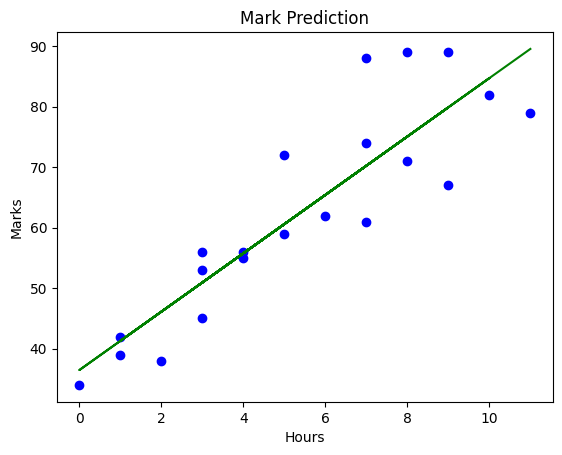

In [ ]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,std_reg.predict(x_train),color="green")
plt.title("Mark Prediction")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.show()

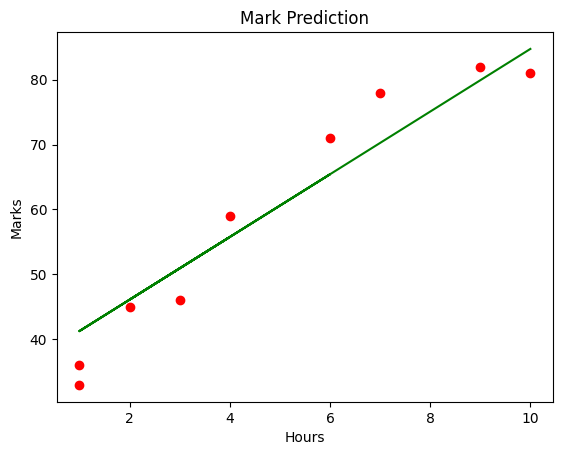

In [ ]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,std_reg.predict(x_test),color="green")
plt.title("Mark Prediction")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,y_predict)

In [ ]:
print(MAE)

4.671353343865192


In [ ]:
MSE = mean_squared_error(y_test,y_predict)

In [ ]:
print(MSE)

26.94512240166313


In [ ]:
RSME = np.sqrt(MSE)

In [ ]:
print(RSME)

5.190869137404943


In [ ]:
LRSME = np.log(RSME)

In [ ]:
print(LRSME)

1.6469011470118082


In [ ]:
R2 = r2_score(y_test,y_predict) # ACCURACY MEASURE

In [ ]:
print(R2)

0.921468231342303
